## import library

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Extracting features and target labels

In [17]:
df = pd.read_csv("D:/Introduce to AI/week1/iris.csv")
X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']] 
y = df['Name']

print(df.head())
print(df.columns)


   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


## #data train 70%, data test 30%

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=42,test_size=0.3)

## train model and set number of trees = 100

In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

## Ues the trained model to predict labels for the test data

In [26]:
rf_pred = rf_model.predict(X_test)

## accuracy of model

In [29]:
rf_accuracy = accuracy_score(Y_test,rf_pred)

##  Print  conditional sentence in the model of tree 1

In [32]:
tree_rules1 = export_text(rf_model.estimators_[0], feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
print("Tree 1:" +"\n"+tree_rules1)

print("----------------------------------")

Tree 1:
|--- PetalWidth <= 1.65
|   |--- PetalWidth <= 0.80
|   |   |--- class: 0.0
|   |--- PetalWidth >  0.80
|   |   |--- PetalLength <= 4.85
|   |   |   |--- class: 1.0
|   |   |--- PetalLength >  4.85
|   |   |   |--- PetalWidth <= 1.55
|   |   |   |   |--- class: 2.0
|   |   |   |--- PetalWidth >  1.55
|   |   |   |   |--- class: 1.0
|--- PetalWidth >  1.65
|   |--- PetalLength <= 4.85
|   |   |--- PetalLength <= 4.65
|   |   |   |--- class: 2.0
|   |   |--- PetalLength >  4.65
|   |   |   |--- SepalLength <= 6.05
|   |   |   |   |--- class: 1.0
|   |   |   |--- SepalLength >  6.05
|   |   |   |   |--- class: 2.0
|   |--- PetalLength >  4.85
|   |   |--- class: 2.0

----------------------------------


## Print  conditional sentence in the model of tree 2

In [35]:
tree_rules2 = export_text(rf_model.estimators_[1], feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
print("Tree 2:" +"\n"+tree_rules2)

Tree 2:
|--- PetalWidth <= 1.65
|   |--- PetalLength <= 2.45
|   |   |--- class: 0.0
|   |--- PetalLength >  2.45
|   |   |--- PetalLength <= 5.35
|   |   |   |--- PetalLength <= 4.95
|   |   |   |   |--- class: 1.0
|   |   |   |--- PetalLength >  4.95
|   |   |   |   |--- PetalLength <= 5.05
|   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- PetalLength >  5.05
|   |   |   |   |   |--- class: 1.0
|   |   |--- PetalLength >  5.35
|   |   |   |--- class: 2.0
|--- PetalWidth >  1.65
|   |--- PetalWidth <= 1.75
|   |   |--- SepalWidth <= 2.75
|   |   |   |--- class: 2.0
|   |   |--- SepalWidth >  2.75
|   |   |   |--- class: 1.0
|   |--- PetalWidth >  1.75
|   |   |--- class: 2.0



## Encode predicted labels into numbers for visualization and accuracy

accuracy: 100.00%


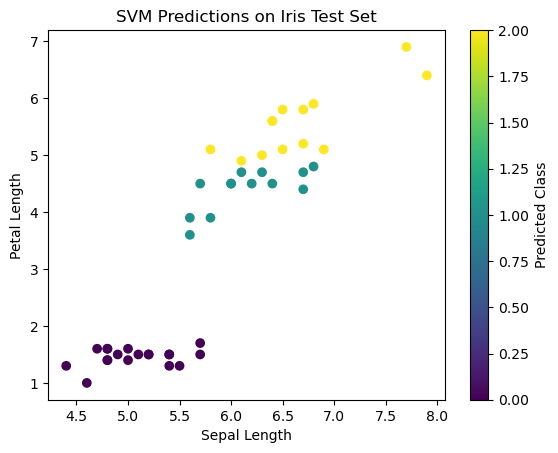

In [38]:
print(f"accuracy: {rf_accuracy * 100:.2f}%") 

label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(rf_pred) 


plt.scatter(X_test['SepalLength'], X_test['PetalLength'], c=y_pred_encoded, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('SVM Predictions on Iris Test Set')
plt.colorbar(label='Predicted Class')  
plt.show()